In [193]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [164]:
df_data = pd.read_csv('dataset/ner.csv')
df_data.dropna(inplace=True)
df_data

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [165]:
def preprocess_data(data):
    for i in range(len(data)):
        pos = ast.literal_eval(data.loc[i, 'POS'])
        tags = ast.literal_eval(data.loc[i, 'Tag'])
        data.loc[i, 'POS'] = [str(word) for word in pos]
        data.loc[i, 'Tag'] = [str(word.upper()) for word in tags]
    return data

In [166]:
df_data = preprocess_data(df_data)
df_data.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"[NNS, IN, NNS, VBP, VBN, IN, NNP, TO, VB, DT, ...","[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"[NNS, IN, NNS, VBN, IN, DT, NN, VBD, DT, NNS, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"[PRP, VBD, IN, DT, NNS, IN, NN, TO, DT, NN, IN...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","[NNS, VBD, DT, NN, IN, NNS, IN, CD, IN, NNS, V...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual con...,"[DT, NN, VBZ, IN, DT, NN, IN, DT, JJ, NN, IN, ...","[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."


In [167]:
df_data_fix = df_data[['Sentence','Tag']]
df_data_fix

,Sentence,Tag
0,Thousands of demonstrators have marched throug...,"[O, O, O, O, O, O, B-GEO, O, O, O, O, O, B-GEO..."
1,Families of soldiers killed in the conflict jo...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,They marched from the Houses of Parliament to ...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, I-GEO..."
3,"Police put the number of marchers at 10,000 wh...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,The protest comes on the eve of the annual con...,"[O, O, O, O, O, O, O, O, O, O, O, B-GEO, O, O,..."
...,...,...
47954,Indian border security forces are accusing the...,"[B-GPE, O, O, O, O, O, O, B-GPE, O, O, O, O, O..."
47955,Indian officials said no one was injured in Sa...,"[B-GPE, O, O, O, O, O, O, O, B-TIM, O, O, O, O..."
47956,Two more landed in fields belonging to a nearb...,"[O, O, O, O, O, O, O, O, O, O, O]"
47957,They say not all of the rockets exploded upon ...,"[O, O, O, O, O, O, O, O, O, O, O]"


In [168]:
x_train, x_test, y_train, y_test = train_test_split(df_data_fix['Sentence'], df_data_fix['Tag'], test_size=0.2, random_state=0)

x_train.shape, x_test.shape

((38367,), (9592,))

In [169]:
EMBEDDING_DIM = 15
X_MAXLEN = max([len(s.split()) for s in x_train])
Y_MAXLEN = max([len(s) for s in y_train])
TRUNCATING = 'post'
PADDING = 'post'
OOV_TOKEN = "<OOV>"

print(X_MAXLEN, Y_MAXLEN)

104 104


In [170]:
x_tokenizer = Tokenizer(oov_token=OOV_TOKEN)
x_tokenizer.fit_on_texts(x_train)

word_index = x_tokenizer.word_index
x_train_seq = x_tokenizer.texts_to_sequences(x_train)
x_train_pad = pad_sequences(x_train_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)
x_test_seq = x_tokenizer.texts_to_sequences(x_test)
x_test_pad = pad_sequences(x_test_seq, maxlen=X_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [171]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(y_train)

y_train_seq = y_tokenizer.texts_to_sequences(y_train)
y_train_pad = pad_sequences(y_train_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)
y_test_seq = y_tokenizer.texts_to_sequences(y_test)
y_test_pad = pad_sequences(y_test_seq, maxlen=Y_MAXLEN, truncating=TRUNCATING, padding=PADDING)

In [172]:
NUM_LABELS = len(y_tokenizer.word_index) + 1

In [183]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index)+1, EMBEDDING_DIM, input_length=X_MAXLEN, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation='relu')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(NUM_LABELS))
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 104, 15)           386325    
                                                                 
 bidirectional_21 (Bidirecti  (None, 104, 128)         40960     
 onal)                                                           
                                                                 
 bidirectional_22 (Bidirecti  (None, 104, 128)         98816     
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDis  (None, 104, 64)          8256      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 104, 18)          1170      
 tributed)                                           

In [184]:
history = model.fit(x_train_pad, y_train_pad, epochs=10, batch_size=64, validation_data=(x_test_pad, y_test_pad))

Epoch 1/10
600/600 [==============================] - 149s 233ms/step - loss: 0.1480 - accuracy: 0.8412 - val_loss: 0.1083 - val_accuracy: 0.8518
Epoch 2/10
600/600 [==============================] - 143s 239ms/step - loss: 0.0982 - accuracy: 0.8598 - val_loss: 0.0871 - val_accuracy: 0.8729
Epoch 3/10
600/600 [==============================] - 150s 251ms/step - loss: 0.0759 - accuracy: 0.8838 - val_loss: 0.0731 - val_accuracy: 0.8877
Epoch 4/10
600/600 [==============================] - 145s 241ms/step - loss: 0.0639 - accuracy: 0.8973 - val_loss: 0.0663 - val_accuracy: 0.8948
Epoch 5/10
600/600 [==============================] - 165s 276ms/step - loss: 0.0564 - accuracy: 0.9065 - val_loss: 0.0643 - val_accuracy: 0.8993
Epoch 6/10
600/600 [==============================] - 160s 267ms/step - loss: 0.0513 - accuracy: 0.9139 - val_loss: 0.0625 - val_accuracy: 0.9021
Epoch 7/10
600/600 [==============================] - 140s 233ms/step - loss: 0.0473 - accuracy: 0.9201 - val_loss: 0.0630 -

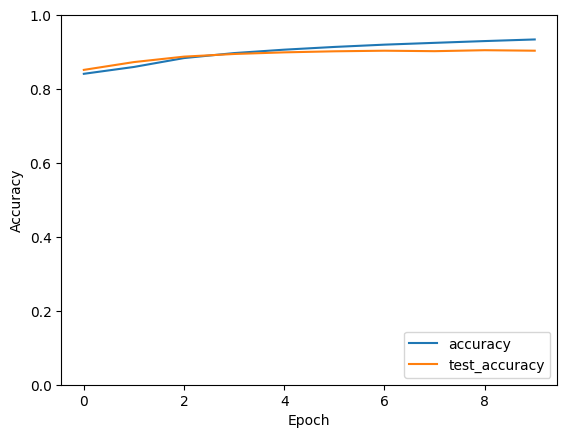

In [185]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [195]:
model.save('ner_model.h5')
with open('x_tokenizer.pickle', 'wb') as handle:
    pickle.dump(x_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('y_tokenizer.pickle', 'wb') as handle:
    pickle.dump(y_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)